<a href="https://colab.research.google.com/github/Ilakiya13ss/CODSOFT/blob/main/Task_3_Movie_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df=pd.read_csv(('movie.csv.zip'),encoding='unicode_escape')

df.head(11)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:

df.drop_duplicates(inplace=True)
df.shape

(5659, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [ ]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df['Year']=df['Year'].fillna(0)
df['Year']=df['Year'].replace(r'[()]','',regex=True).astype(int)
print(df['Year'])


1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int64


In [ ]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace(' min', ''))
genres = df['Genre'].value_counts()
genres

,count
Genre,
Drama,844
"Drama, Romance",332
"Action, Crime, Drama",329
"Action, Drama",206
"Comedy, Drama",205
...,...
"Action, Comedy, War",1
"Mystery, Sci-Fi",1
"Horror, Romance, Sci-Fi",1


/tmp/ipython-input-425-2570399572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)


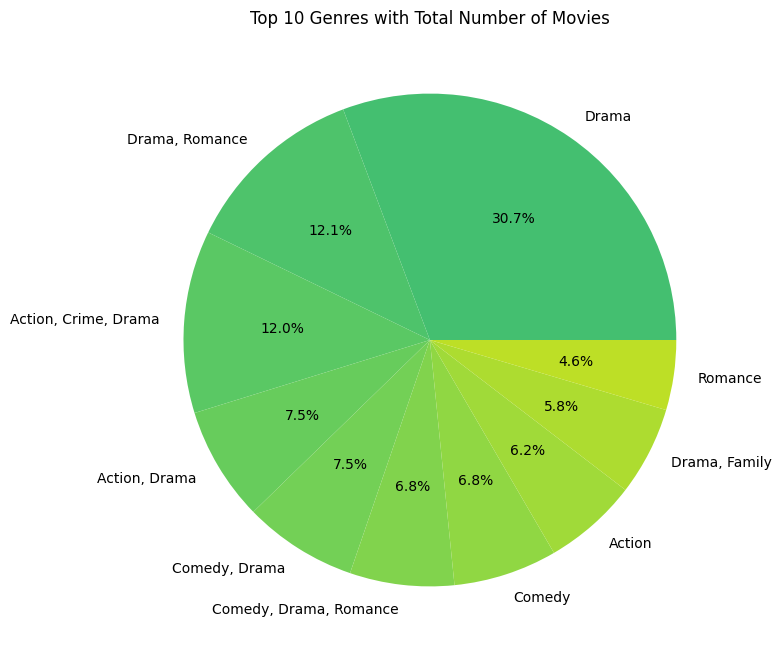

In [ ]:
df['Genre']=df['Genre'].str.split(', ')
df= df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)
top_genres=genres.head(10)
plt.figure(figsize=(8,8))
colors = plt.cm.viridis(np.linspace(0.7,0.9,len(top_genres)))
plt.pie(top_genres.values,labels=top_genres.index,autopct="%1.1f%%",colors=colors)
plt.title('Top 10 Genres with Total Number of Movies')
plt.show()


In [ ]:
Year = df['Year'].value_counts()
Year

,count
Year,
2019,423
2013,374
2017,372
2018,358
2015,353
...,...
1939,4
1934,3
1931,3


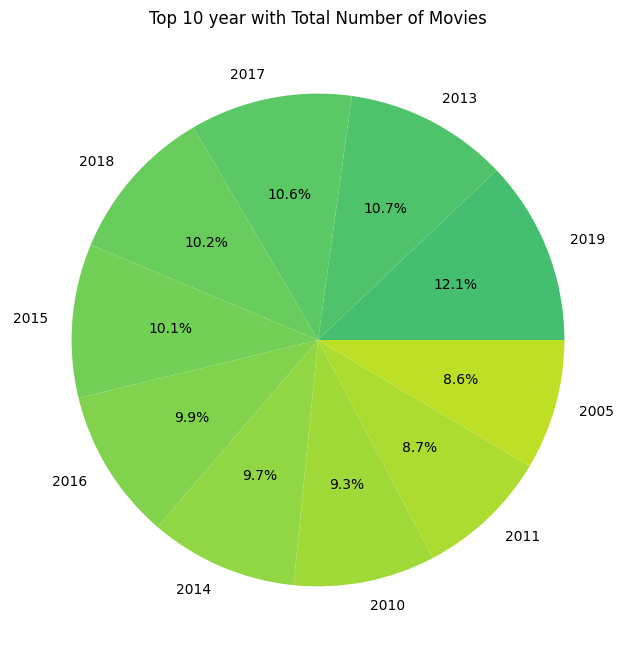

In [ ]:
top_Year = Year.head(10)
plt.figure(figsize=(8,8))
colors = plt.cm.viridis(np.linspace(0.7,0.9,len(top_Year)))
plt.pie(top_Year.values,labels =top_Year.index , autopct = '%1.1f%%',colors=colors)
plt.title('Top 10 year with Total Number of Movies')
plt.show()

In [ ]:
directors = df['Director'].value_counts()
directors

,count
Director,
David Dhawan,103
Ram Gopal Varma,93
Mahesh Bhatt,87
Vikram Bhatt,80
Priyadarshan,74
...,...
Sridhar Reddy,1
Aziz Zee,1
Prashant Gore,1


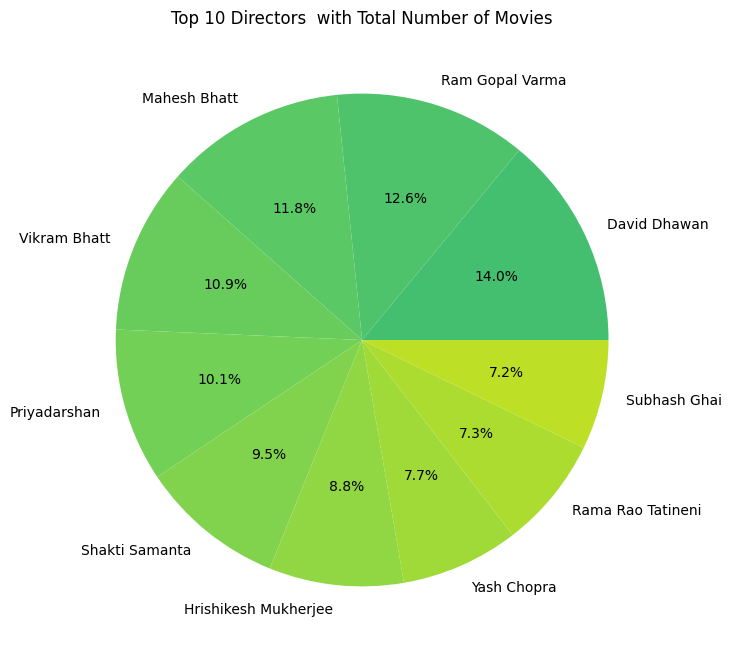

In [ ]:
top_directors= directors.head(10)
plt.figure(figsize=(8,8))
colors = plt.cm.viridis(np.linspace(0.7,0.9,len(top_directors)))
plt.pie(top_directors.values,labels =top_directors.index , autopct = '%1.1f%%',colors=colors)
plt.title('Top 10 Directors  with Total Number of Movies')
plt.show()


In [ ]:
actors = pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']]).value_counts()
actors


,count
Amitabh Bachchan,375
Dharmendra,315
Akshay Kumar,315
Mithun Chakraborty,309
Ashok Kumar,266
...,...
Monica Aggarwal,1
Jahmil X.T. Qubeka,1
Kimti Anand,1
Amitkumar Sharma,1


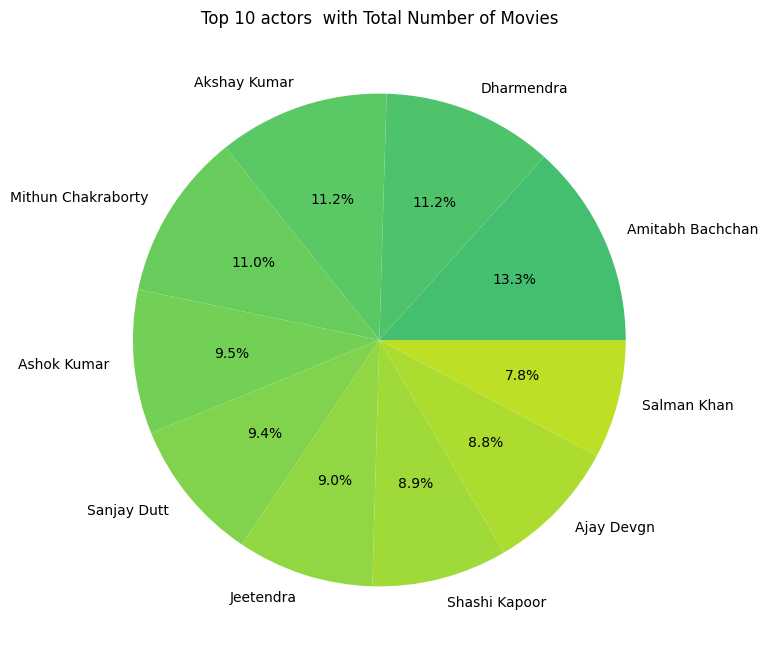

In [ ]:

Top_actors= actors.head(10)
plt.figure(figsize=(8,8))
colors = plt.cm.viridis(np.linspace(0.7,0.9,len(Top_actors)))
plt.pie(Top_actors.values,labels =Top_actors.index , autopct = '%1.1f%%',colors=colors)
plt.title('Top 10 actors  with Total Number of Movies')
plt.show()


In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)
print(df.head(10))

#df = df.drop(columns=['Name'])
'''
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating':'mean'}).to_dict()
actor2_encoding_map=df.groupby('Actor 2').agg({'Rating':'mean'}).to_dict()
actor3_encoding_map=df.groupby('Actor 3').agg({'Rating':'mean'}).to_dict()
director_encoding_map=df.groupby('Director').agg({'Rating':'mean'}).to_dict()
genre_encoding_map=df.groupby('Genre').agg({'Rating':'mean'}).to_dict()
'''

                                 Name  Year  Duration    Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019       109    Drama     7.0      8   
3                             #Yaaram  2019       110   Comedy     4.4     35   
3                             #Yaaram  2019       110  Romance     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997       147   Comedy     4.7    827   
5                ...Aur Pyaar Ho Gaya  1997       147    Drama     4.7    827   
5                ...Aur Pyaar Ho Gaya  1997       147  Musical     4.7    827   
6                           ...Yahaan  2005       142    Drama     7.4  1,086   
6                           ...Yahaan  2005       142  Romance     7.4  1,086   
6                           ...Yahaan  2005       142      War     7.4  1,086   
8                  ?: A Question Mark  2012        82   Horror     5.6    326   

         Director          Actor 1                 Actor 2          Actor 3  
1   Gaurav Bakshi     Rasika D

/tmp/ipython-input-432-1850953182.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)


"\nactor1_encoding_map = df.groupby('Actor 1').agg({'Rating':'mean'}).to_dict()\nactor2_encoding_map=df.groupby('Actor 2').agg({'Rating':'mean'}).to_dict()\nactor3_encoding_map=df.groupby('Actor 3').agg({'Rating':'mean'}).to_dict()\ndirector_encoding_map=df.groupby('Director').agg({'Rating':'mean'}).to_dict()\ngenre_encoding_map=df.groupby('Genre').agg({'Rating':'mean'}).to_dict()\n"

In [ ]:
def clean_duration(duration):
    if isinstance(duration,str):
       return float(' '.join(filter(str.isdigit,duration)))
    return duration
df['Duration']=df['Duration'].apply(clean_duration)
df['Votes']=df['Votes'].astype(str)
df['Votes']=df['Votes'].str.replace(',','').astype(int)
df['Year']=df['Year'].astype(str)
df['Year']=df['Year'].str.strip('()').astype(int)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating':'mean'}).to_dict()
actor2_encoding_map=df.groupby('Actor 2').agg({'Rating':'mean'}).to_dict()
actor3_encoding_map=df.groupby('Actor 3').agg({'Rating':'mean'}).to_dict()
director_encoding_map=df.groupby('Director').agg({'Rating':'mean'}).to_dict()
genre_encoding_map=df.groupby('Genre').agg({'Rating':'mean'}).to_dict()

In [ ]:

df['encoded_actor1']=round(df['Actor 1'].map(actor1_encoding_map['Rating']),1)
df['encoded_actor2']=round(df['Actor 2'].map(actor2_encoding_map['Rating']),1)
df['encoded_actor3']=round(df['Actor 3'].map(actor3_encoding_map['Rating']),1)
df['encoded_director']=round(df['Director'].map(director_encoding_map['Rating']),1)
df['encoded_genre']=round(df['Genre'].map(genre_encoding_map['Rating']),1)

df.drop(['Actor 1','Actor 3','Director','Genre'],axis =1,inplace =True)


In [ ]:
test_data=df.drop(columns=['Rating'])
test_data

,Name,Year,Duration,Votes,Actor 2,encoded_actor1,encoded_actor2,encoded_actor3,encoded_director,encoded_genre
1,#Gadhvi (He thought he was Gandhi),2019,109,8,Vivek Ghamande,6.8,7.0,7.0,7.0,6.1
3,#Yaaram,2019,110,35,Ishita Raj,5.2,4.4,4.5,4.4,5.8
3,#Yaaram,2019,110,35,Ishita Raj,5.2,4.4,4.5,4.4,5.8
5,...Aur Pyaar Ho Gaya,1997,147,827,Aishwarya Rai Bachchan,4.8,5.7,5.9,5.3,5.8
5,...Aur Pyaar Ho Gaya,1997,147,827,Aishwarya Rai Bachchan,4.8,5.7,5.9,5.3,6.1
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,44,Jayamalini,6.4,5.8,6.0,6.3,6.1
15505,Zulmi,1999,129,655,Twinkle Khanna,5.4,4.6,5.8,5.2,5.5
15505,Zulmi,1999,129,655,Twinkle Khanna,5.4,4.6,5.8,5.2,6.1
15508,Zulm-O-Sitam,1998,130,20,Jaya Prada,6.0,5.6,5.8,4.1,5.5


In [ ]:
ratings = df['Rating']
ratings

,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7
...,...
15503,5.8
15505,4.5
15505,4.5
15508,6.2
